# 2019.02 Ford Go Bike - trip data
## by Szymon Debski

## Investigation Overview

> The exploration and visualization purpose is to find a pattern in bike riding history, mainly focusing on ride duration and characteristics of people riding the bike.

## Dataset Overview

> The data set is the Ford Go Bike trip data. The data was collected in February 2019 in San Francisco Bay Area. The data set I will be using has over 18 hundred records and information such as (trip duration, sex, user type, date of birth). All the analysis presented below is based on this data after it has been wrangled.

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
df = pd.read_csv('df_clean.csv')
df.head()


,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,hour,duration_minutes,age
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974.0,Male,Yes,Thursday,23,26,45
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,5200,Subscriber,1959.0,Male,No,Thursday,23,30,60
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,3803,Subscriber,1983.0,Female,No,Thursday,23,19,36
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,6329,Subscriber,1989.0,Male,No,Thursday,23,27,30
4,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,6488,Subscriber,1992.0,Male,No,Thursday,23,17,27


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169513 entries, 0 to 169512
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             169513 non-null  int64  
 1   start_time               169513 non-null  object 
 2   end_time                 169513 non-null  object 
 3   bike_id                  169513 non-null  int64  
 4   user_type                169513 non-null  object 
 5   member_birth_year        169513 non-null  float64
 6   member_gender            169513 non-null  object 
 7   bike_share_for_all_trip  169513 non-null  object 
 8   weekday                  169513 non-null  object 
 9   hour                     169513 non-null  int64  
 10  duration_minutes         169513 non-null  int64  
 11  age                      169513 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 15.5+ MB


In [22]:
ratios = pd.read_csv('ratios.csv')
ratios

,weekday,user_type,quantity,ratio
0,Monday,Customer,2216,0.140484
1,Tuesday,Customer,2197,0.139280
2,Wednesday,Customer,1997,0.126601
3,Thursday,Customer,2729,0.173006
4,Friday,Customer,2418,0.153290
5,Saturday,Customer,2067,0.131038
6,Sunday,Customer,2150,0.136300
7,Monday,Subscriber,22619,0.147126
8,Tuesday,Subscriber,27563,0.179284
9,Wednesday,Subscriber,25590,0.166451


In [23]:
ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   weekday    14 non-null     object 
 1   user_type  14 non-null     object 
 2   quantity   14 non-null     int64  
 3   ratio      14 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 576.0+ bytes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User Type by Weekday bike use

>As we can see from the first graph most of the people using the service are Subscribers 90.7% the rest are random customers 9.3%.

> In the second graph we can see an interesting observation - during the working week proportionally subscribers used the service more, however, on the weekend regular (random) customer used it proportionally more often. This means that on the weekend many casual bike riders use the service and people that use it during the week for commuting don't use the service as often.

In [24]:
plt.rcParams.update({'font.size': 12})

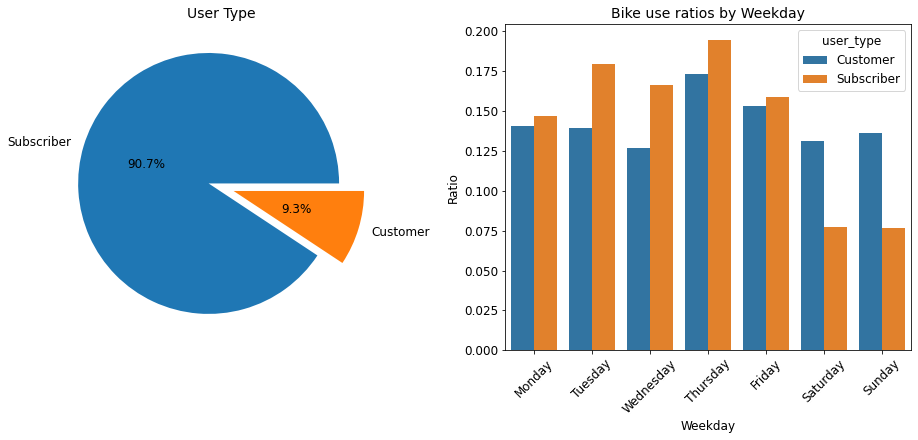

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
vals = df.user_type.value_counts()/df.shape[0]
labels = vals.keys()
plt.pie(x=vals, autopct="%.1f%%", explode=[0.1]*2, labels=labels, pctdistance=0.5)
plt.title("User Type", fontsize=14);
plt.subplot(1, 2, 2)
sb.barplot(x='weekday', y='ratio', hue='user_type', data=ratios);
plt.xlabel('Weekday');
plt.ylabel('Ratio');
plt.xticks(rotation = 45);
plt.title("Bike use ratios by Weekday", fontsize=14);

## Bike user count by Gender and time of day the bike was rented

> The hour at which the bikes are rented is also interesting. We can see that people mostly use the bikes around 8 AM and 5 PM. This indicates that the main way people use the bike is for commuting.

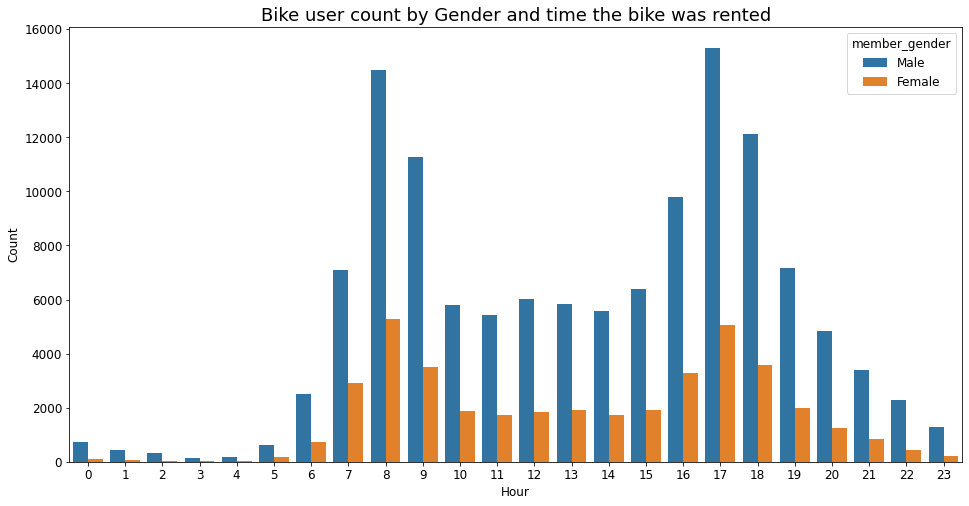

In [26]:
fig = plt.figure(figsize = [16,8])
sb.countplot(data = df, x = 'hour', hue = 'member_gender');
plt.xlabel('Hour');
plt.ylabel('Count');
plt.title("Bike user count by Gender and time the bike was rented", fontsize=18);

## Bike rental time by gender and age

>Below we can see an interesting observation. We can verify that female bike riders tend to rent the bike for longer. Also, we can verify that the youngest people rent the bike for longer periods. However, one interesting thing to note is that people that are older than 50 years tend to rent the bike for longer periods compared to 30 - 50-year-olds. This is a very interesting observation which may indicate the people after 50 use the bike more for exercise as a fitness tool as opposed to a commuting tool.

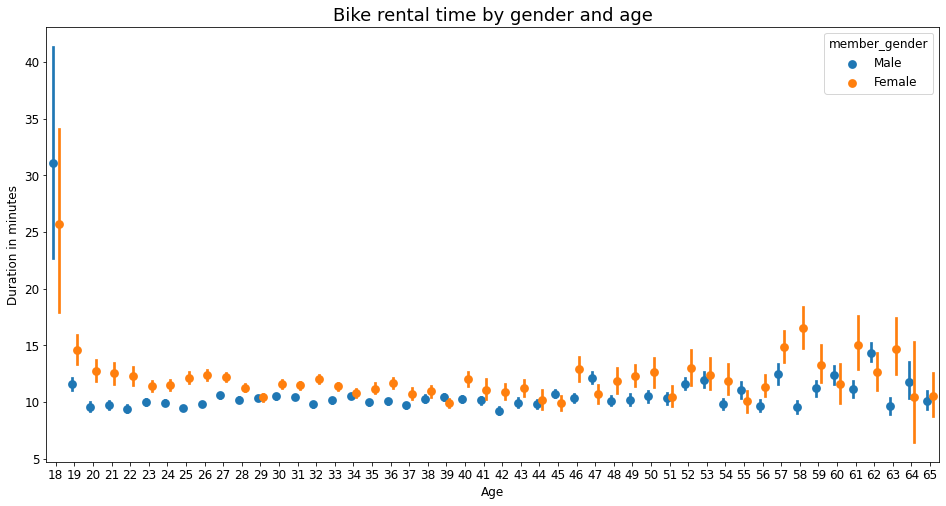

In [27]:
fig = plt.figure(figsize = [16,8])
sb.pointplot(data=df, x='age', y='duration_minutes', hue='member_gender', dodge=0.3, linestyles="");
plt.xlabel('Age');
plt.ylabel('Duration in minutes');
plt.title("Bike rental time by gender and age", fontsize=18);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!